In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colors as colors
import matplotlib as mpl

In [2]:
randomState = 42
np.random.seed(randomState)
tf.set_random_seed(randomState)

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
df5 = pd.read_csv('/content/gdrive/MyDrive/SoilMoisture/Data/c_5_data_soil_5.csv')
df10 = pd.read_csv('/content/gdrive/MyDrive/SoilMoisture/Data/c_5_data_soil_10.csv')
df20 = pd.read_csv('/content/gdrive/MyDrive/SoilMoisture/Data/c_5_data_soil_20.csv')
df50 = pd.read_csv('/content/gdrive/MyDrive/SoilMoisture/Data/c_5_data_soil_50.csv')
df100 = pd.read_csv('/content/gdrive/MyDrive/SoilMoisture/Data/c_5_data_soil_100.csv')

df5 = df5.rename(columns={'In-Situ':'InSitu'})
df10 = df10.rename(columns={'In-Situ':'InSitu'})
df20 = df20.rename(columns={'In-Situ':'InSitu'})
df50 = df50.rename(columns={'In-Situ':'InSitu'})
df100 = df100.rename(columns={'In-Situ':'InSitu'})

def replace_missing(attribute):
    return attribute.interpolate(inplace=True)

replace_missing(df5['NDVI'])
replace_missing(df5['EVI'])
replace_missing(df5['LSTDay'])
replace_missing(df5['LSTNight'])

replace_missing(df10['NDVI'])
replace_missing(df10['EVI'])
replace_missing(df10['LSTDay'])
replace_missing(df10['LSTNight'])

replace_missing(df20['NDVI'])
replace_missing(df20['EVI'])
replace_missing(df20['LSTDay'])
replace_missing(df20['LSTNight'])

replace_missing(df50['NDVI'])
replace_missing(df50['EVI'])
replace_missing(df50['LSTDay'])
replace_missing(df50['LSTNight'])

replace_missing(df100['NDVI'])
replace_missing(df100['EVI'])
replace_missing(df100['LSTDay'])
replace_missing(df100['LSTNight'])


df5 = df5.dropna()
df10 = df10.dropna()
df20 = df20.dropna()
df50 = df50.dropna()
df100 = df100.dropna()

In [5]:
# df5.pop("RZSM")

raw5 = df5.copy()
raw10 = df10.copy()
raw20 = df20.copy()
raw50 = df50.copy()
raw100 = df100.copy()

raw5.pop("InSitu")
raw10.pop("InSitu")
raw20.pop("InSitu")
raw50.pop("InSitu")
raw100.pop("InSitu")

2        0.20708
3        0.20679
4        0.20750
5        0.20929
6        0.20937
          ...   
42497    0.39700
42498    0.39700
42499    0.39700
42500    0.39700
42501    0.39711
Name: InSitu, Length: 42500, dtype: float64

In [6]:
x5 = []
y5 = []
for col in raw5.columns:
    x5.append(col)
    y5.append(round(st.pearsonr(raw5[col], df5['InSitu'])[0], 3))
print(x5)
print(y5)

['Precip', 'NDVI', 'EVI', 'GPP', 'LSTDay', 'LSTNight', 'Elevation', 'RZSM', 'SURFSM', 'Clay', 'Sand', 'Silt', 'BD']
[0.126, -0.078, -0.086, -0.192, -0.249, -0.242, 0.249, 0.564, 0.597, 0.308, -0.385, 0.444, -0.038]


In [7]:
x10 = []
y10 = []
for col in raw10.columns:
    x10.append(col)
    y10.append(round(st.pearsonr(raw10[col], df10['InSitu'])[0], 3))
print(x10)
print(y10)

['Precip', 'NDVI', 'EVI', 'GPP', 'LSTDay', 'LSTNight', 'Elevation', 'RZSM', 'SURFSM', 'Clay', 'Sand', 'Silt', 'BD']
[0.096, -0.187, -0.169, -0.249, -0.204, -0.239, 0.314, 0.588, 0.557, 0.411, -0.436, 0.47, -0.005]


In [8]:
x20 = []
y20 = []
for col in raw20.columns:
    x20.append(col)
    y20.append(round(st.pearsonr(raw20[col], df20['InSitu'])[0], 3))
print(x20)
print(y20)

['Precip', 'NDVI', 'EVI', 'GPP', 'LSTDay', 'LSTNight', 'Elevation', 'RZSM', 'SURFSM', 'Clay', 'Sand', 'Silt', 'BD']
[0.049, -0.22, -0.164, -0.267, -0.113, -0.202, 0.399, 0.651, 0.503, 0.477, -0.495, 0.534, -0.006]


In [9]:
x50 = []
y50 = []
for col in raw50.columns:
    x50.append(col)
    y50.append(round(st.pearsonr(raw50[col], df50['InSitu'])[0], 3))
print(x50)
print(y50)

['Precip', 'NDVI', 'EVI', 'GPP', 'LSTDay', 'LSTNight', 'Elevation', 'RZSM', 'SURFSM', 'Clay', 'Sand', 'Silt', 'BD']
[0.024, -0.162, -0.119, -0.265, -0.064, -0.149, 0.4, 0.508, 0.346, 0.419, -0.544, 0.467, -0.179]


In [10]:
x100 = []
y100 = []
for col in raw100.columns:
    x100.append(col)
    y100.append(round(st.pearsonr(raw100[col], df100['InSitu'])[0], 3))
print(x100)
print(y100)

['Precip', 'NDVI', 'EVI', 'GPP', 'LSTDay', 'LSTNight', 'Elevation', 'RZSM', 'SURFSM', 'Clay', 'Sand', 'Silt', 'BD']
[0.021, -0.117, -0.041, -0.206, -0.056, -0.138, 0.141, 0.403, 0.331, 0.291, -0.409, 0.31, -0.002]


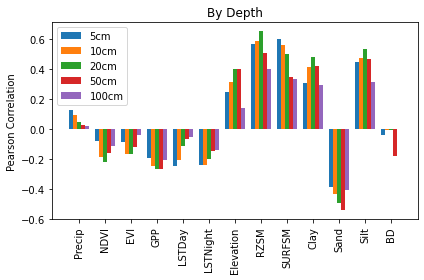

In [11]:
lxn = np.arange(len(x5))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(lxn - 2*width, y5, width, label='5cm')
rects2 = ax.bar(lxn - width, y10, width, label='10cm')
rects3 = ax.bar(lxn , y20, width, label='20cm')
rects4 = ax.bar(lxn + width, y50, width, label='50cm')
rects5 = ax.bar(lxn + 2*width, y100, width, label='100cm')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Pearson Correlation')
ax.set_title('By Depth')
ax.set_xticks(lxn)
ax.set_xticklabels(x5, rotation=90)
ax.legend()

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)
# ax.bar_label(rects3, padding=3)
# ax.bar_label(rects4, padding=3)
# ax.bar_label(rects5, padding=3)

fig.tight_layout()

plt.savefig('/content/gdrive/MyDrive/SoilMoisture/PearsonCorrelation.png', dpi=400)
plt.show()